In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# Пример текстовых данных
documents = [
    "Машинное обучение - то интересная область.",
    "то интересная область. Машинное обучение - ",
    "Глубокое Машинное обучение - это интересная область.",
    "Машинное обучение - это очень интересная область.",
    "Машинное обучение - это неинтересная область."
]

In [44]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
feature_names = tfidf_vectorizer.get_feature_names_out()

df = pd.DataFrame(tfidf_matrix.todense().tolist(), columns = feature_names, index = ["документ_" + str(i) for i in range(len(documents))])
df

,глубокое,интересная,машинное,неинтересная,область,обучение,очень,то,это
документ_0,0.000000,0.438661,0.371016,0.000000,0.371016,0.371016,0.000000,0.628186,0.000000
документ_1,0.000000,0.438661,0.371016,0.000000,0.371016,0.371016,0.000000,0.628186,0.000000
документ_2,0.639257,0.360146,0.304609,0.000000,0.304609,0.304609,0.000000,0.000000,0.428118
документ_3,0.000000,0.360146,0.304609,0.000000,0.304609,0.304609,0.639257,0.000000,0.428118
документ_4,0.000000,0.000000,0.326520,0.685239,0.326520,0.326520,0.000000,0.000000,0.458913


In [45]:
df.index.tolist()

['документ_0', 'документ_1', 'документ_2', 'документ_3', 'документ_4']

In [46]:
cosine_similarity_matrix  = cosine_similarity(tfidf_matrix)
cosine_similarity_matrix

array([[1.        , 1.        , 0.49702725, 0.49702725, 0.3634331 ],
       [1.        , 1.        , 0.49702725, 0.49702725, 0.3634331 ],
       [0.49702725, 0.49702725, 1.        , 0.59135064, 0.49485197],
       [0.49702725, 0.49702725, 0.59135064, 1.        , 0.49485197],
       [0.3634331 , 0.3634331 , 0.49485197, 0.49485197, 1.        ]])

In [47]:
df_cos = pd.DataFrame(cosine_similarity_matrix.tolist(), index=df.index.tolist(), columns=df.index.tolist())
df_cos

,документ_0,документ_1,документ_2,документ_3,документ_4
документ_0,1.000000,1.000000,0.497027,0.497027,0.363433
документ_1,1.000000,1.000000,0.497027,0.497027,0.363433
документ_2,0.497027,0.497027,1.000000,0.591351,0.494852
документ_3,0.497027,0.497027,0.591351,1.000000,0.494852
документ_4,0.363433,0.363433,0.494852,0.494852,1.000000


<Axes: >

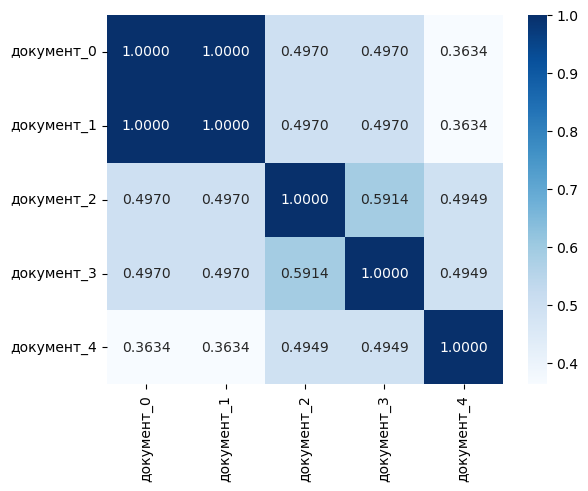

In [48]:
#plt.figure(figsize = (24,16))
sns.heatmap(df_cos, cmap="Blues", annot=True, fmt=".4f") 
#, annot= True,fmt=".1f"

Другой пример

In [49]:
df = pd.DataFrame({'docId': [1,2,3], 
               'sent': ['This is the first sentence','This is the second sentence', 'This is the third sentence']})

In [50]:
df

,docId,sent
0,1,This is the first sentence
1,2,This is the second sentence
2,3,This is the third sentence


In [51]:
v = TfidfVectorizer()
x = v.fit_transform(df['sent'])
x.toarray()

array([[0.64612892, 0.38161415, 0.        , 0.38161415, 0.38161415,
        0.        , 0.38161415],
       [0.        , 0.38161415, 0.64612892, 0.38161415, 0.38161415,
        0.        , 0.38161415],
       [0.        , 0.38161415, 0.        , 0.38161415, 0.38161415,
        0.64612892, 0.38161415]])

In [52]:
v.get_feature_names()

c:\Users\seismopro\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['first', 'is', 'second', 'sentence', 'the', 'third', 'this']

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Пример текстовых данных
documents = [
    "Искусственный интеллект становится все более распространенным.",
    "Интеллектуальные системы обладают большим потенциалом."
]

# Создание объекта TfidfVectorizer с использованием биграмм
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 1))

# Применение TF-IDF к текстовым данным
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Получение списка фичей и их значения TF-IDF для первого документа
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.toarray()[0]

# Сортировка фичей по значениям TF-IDF
sorted_features = [feature for _, feature in sorted(zip(tfidf_scores, feature_names), reverse=True)]

print("Важные фичи:", sorted_features)

Важные фичи: ['становится', 'распространенным', 'искусственный', 'интеллект', 'все', 'более', 'системы', 'потенциалом', 'обладают', 'интеллектуальные', 'большим']
